In [1]:
# Instalar a biblioteca Prophet, que usaremos para a previsão
%pip install prophet

# Importar as bibliotecas necessárias
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


Importing plotly failed. Interactive plots will not work.


In [2]:
# Carregar os dados processados
df = pd.read_csv("../data/processed/monthly_costs_by_provider.csv")

# Converter a coluna 'ds' para o formato de data
df['ds'] = pd.to_datetime(df['ds'])

# Exibir os dados
print("--- Dados Carregados para a Previsão ---")
print(df.head())

--- Dados Carregados para a Previsão ---
  Provider         ds         y
0      AWS 2024-06-30   6758.77
1      AWS 2024-07-31  11667.81
2      AWS 2024-08-31  12558.92
3      AWS 2024-09-30  12076.95
4      AWS 2024-10-31  12862.35


In [3]:
# Treinar o modelo e fazer previsões para cada provedor
all_forecasts = []

for provider in df['Provider'].unique():
    # Filtrar os dados para o provedor atual
    provider_df = df[df['Provider'] == provider].copy()
    
    # Criar e treinar o modelo
    model = Prophet(
        growth='linear',
        seasonality_mode='multiplicative',
        weekly_seasonality=False,
        daily_seasonality=False
    )
    model.fit(provider_df)
    
    # Criar um DataFrame com datas futuras (12 meses)
    future = model.make_future_dataframe(periods=12, freq='M')
    
    # Fazer a previsão
    forecast = model.predict(future)
    
    # Adicionar o provedor à previsão
    forecast['Provider'] = provider
    
    # Armazenar a previsão
    all_forecasts.append(forecast)

# Concatenar todos os DataFrames de previsão em um só
forecast_df = pd.concat(all_forecasts)

print("--- Previsões Geradas ---")
print(forecast_df[['ds', 'yhat', 'Provider']].head())

06:55:28 - cmdstanpy - INFO - Chain [1] start processing
06:55:28 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\izado\OneDrive\Desktop\focus-cost-forecast-ia\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
06:55:29 - cmdstanpy - INFO - Chain [1] start processing
06:55:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\izado\OneDrive\Desktop\focus-cost-forecast-ia\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
06:55:29 - cmdstanpy - INFO - Chain [1] start processing
06:55:29 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\izado\OneDrive\Desktop\focus-cost-forecast-ia\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' in

--- Previsões Geradas ---
          ds          yhat Provider
0 2024-06-30  11790.811593      AWS
1 2024-07-31  11760.357536      AWS
2 2024-08-31  11729.903479      AWS
3 2024-09-30  11700.431809      AWS
4 2024-10-31  11669.977749      AWS


c:\Users\izado\OneDrive\Desktop\focus-cost-forecast-ia\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


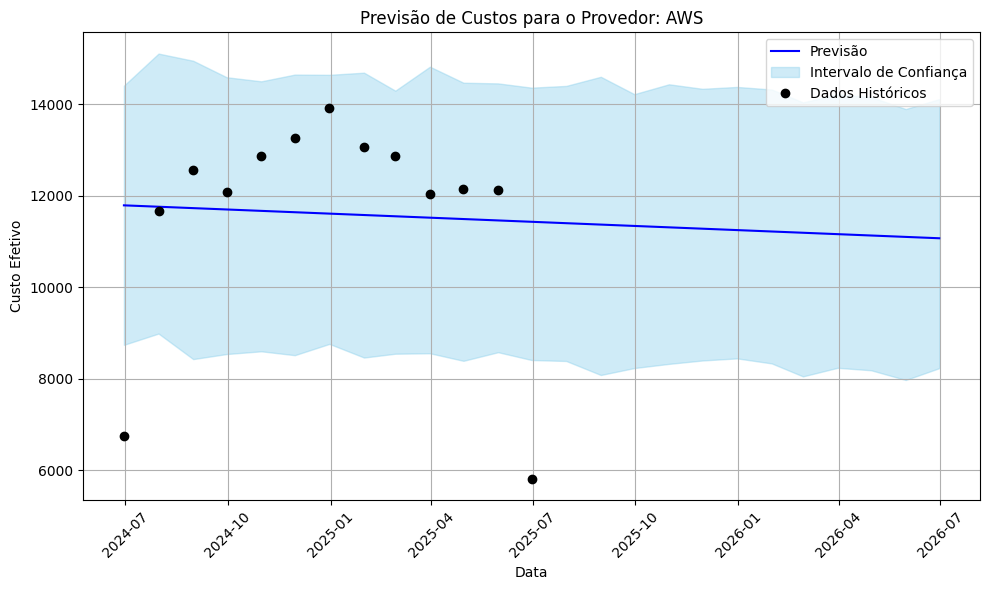

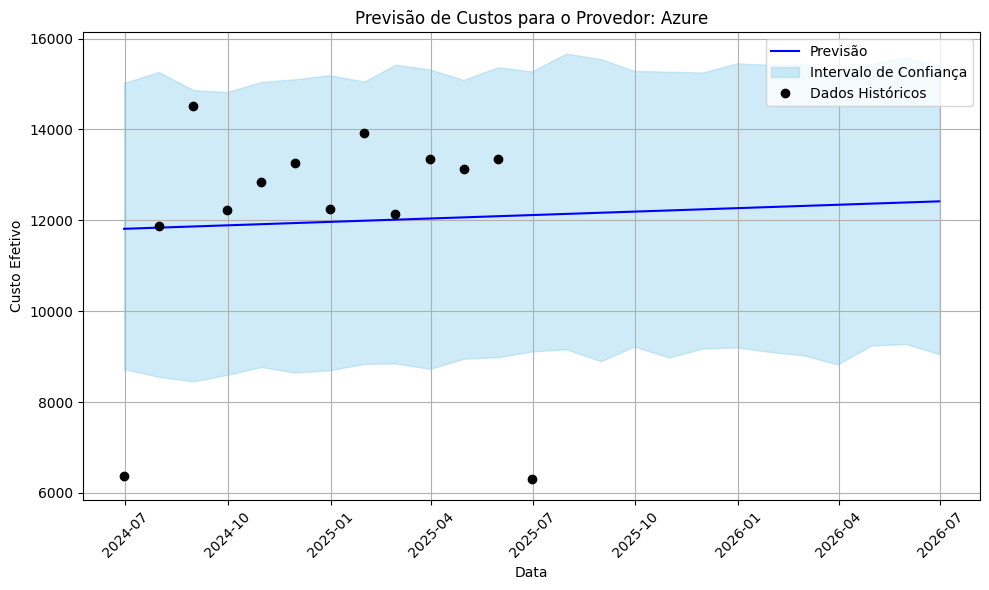

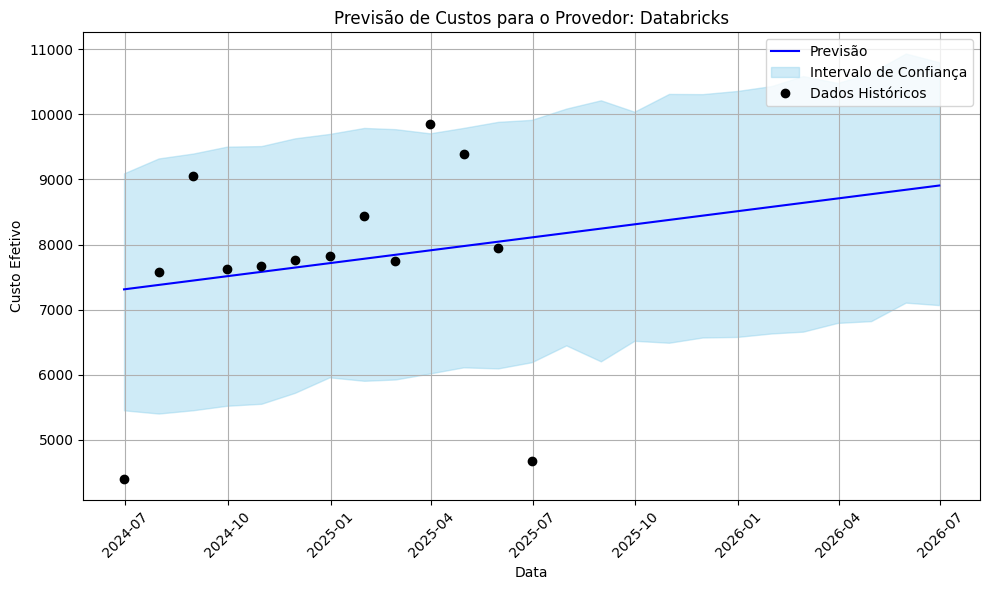

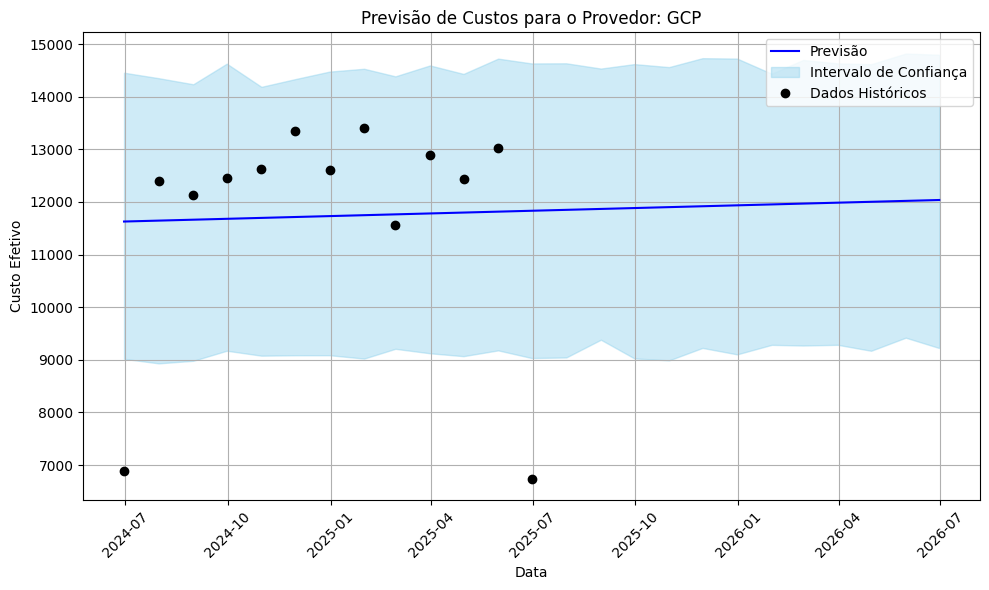

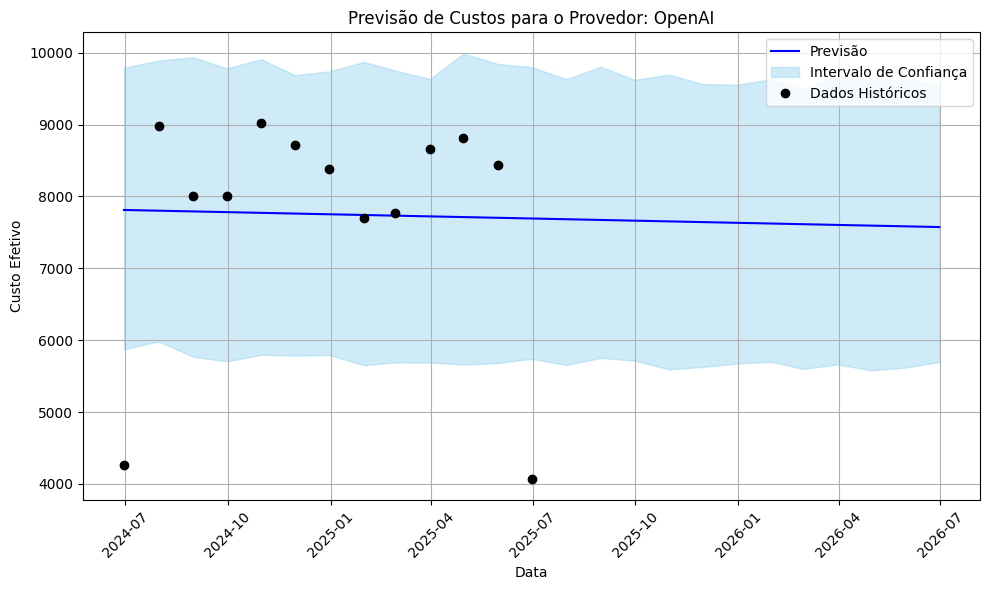

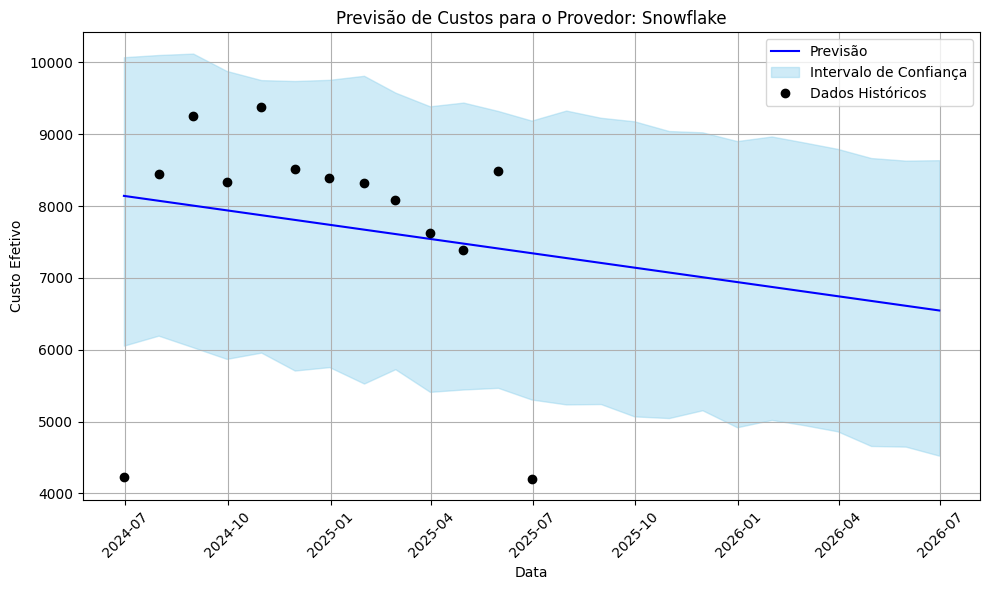

In [4]:
for provider in forecast_df['Provider'].unique():
    provider_forecast = forecast_df[forecast_df['Provider'] == provider]
    
    plt.figure(figsize=(10, 6))
    
    # Plotar o gráfico da previsão
    plt.plot(provider_forecast['ds'], provider_forecast['yhat'], label='Previsão', color='blue')
    plt.fill_between(
        provider_forecast['ds'], 
        provider_forecast['yhat_lower'], 
        provider_forecast['yhat_upper'], 
        color='skyblue', 
        alpha=0.4, 
        label='Intervalo de Confiança'
    )
    
    # Plotar os dados históricos
    historical_data = df[df['Provider'] == provider]
    plt.plot(historical_data['ds'], historical_data['y'], 'o', color='black', label='Dados Históricos')

    plt.title(f'Previsão de Custos para o Provedor: {provider}')
    plt.xlabel('Data')
    plt.ylabel('Custo Efetivo')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
# Salvar os resultados da previsão
forecast_df.to_csv("../data/processed/forecast_results.csv", index=False)
print("Resultados da previsão salvos em 'data/processed/forecast_results.csv'.")

Resultados da previsão salvos em 'data/processed/forecast_results.csv'.
